In [26]:
import numba
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [28]:
#preprocessing
df = pd.read_csv("CarPrice_Assignment.csv", index_col=0)
df["CarCompany"] = df["CarName"].apply(lambda x: x.split()[0])
df = df.drop(columns=["CarName"])
df["CarCompany"][df["CarCompany"]=="toyouta"]="toyota"
df["CarCompany"][df["CarCompany"]=="vokswagen"]="volkswagen"
df["CarCompany"][df["CarCompany"]=="vw"]="volkswagen"
df["CarCompany"][df["CarCompany"]=="porcshce"]="porsche"
df["CarCompany"][df["CarCompany"]=="Nissan"]="nissan"
for col in df.columns:
    if type(df[col][1]) not in [np.int64, np.float64]:
        dists = df[col].drop_duplicates()
        i = 0
        for el in dists:
            df[col][df[col]==el]=i
            i+=1
        df[col]=pd.to_numeric(df[col])
df.to_csv("CarData_PreProccessed.csv")

/tmp/ipykernel_28797/1718663977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CarCompany"][df["CarCompany"]=="toyouta"]="toyota"
/tmp/ipykernel_28797/1718663977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CarCompany"][df["CarCompany"]=="vokswagen"]="volkswagen"
/tmp/ipykernel_28797/1718663977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CarCompany"][df["CarCompany"]=="vw"]="volkswagen"
/tmp/ipykernel_28

In [62]:
weights = np.array([[]], dtype=np.float64)
biases = np.array([[]], dtype=np.float64)

In [44]:
# cost function
@numba.jit
def total_cost(weights, biases, x, y):
    return np.sum((weights @ x + biases - y) ** 2) / 2 / len(y[0])

# gradient descent
@numba.jit(nopython=True)
def fit(weights, biases, x, y, alpha=0.00000001, iters=2000):
    DATALEN: int = len(y[0])
    NOUT: int = len(y)
    NVARS: int = len(x)
    if weights.shape==(1,0):
        weights = np.random.rand(NOUT, NVARS)
    if biases.shape==(1,0):
        biases = np.random.rand(1, NOUT)
    history = []
    for i in range(iters):
        error = (weights @ x + biases) - y
        weights -= (error @ x.T / DATALEN) * alpha
        biases -= (error / DATALEN) * alpha
        if i%100000==0:
            print('.')
        history.append([i, total_cost(weights, biases, x, y)])
    return weights, biases, history

# prediction
@numba.jit
def predict(weights, biases, x):
    return weights @ x + biases

@numba.jit
def r_squared(prediction, values):
    sstot = np.sum((values-np.mean(values))**2)
    ssres = np.sum((values-prediction)**2)
    return 1-ssres/sstot

In [30]:
display(HTML(df.to_html()))

Xdat = df[["symboling","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","wheelbase","carlength","carwidth","carheight","curbweight","enginetype","cylindernumber","enginesize","fuelsystem","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price","CarCompany"
]].to_numpy().T#df[["enginetype", "cylindernumber", "enginesize", "fuelsystem", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]].to_numpy().T
Ydat = df[["price"]].to_numpy().T

# Scaling down data
for i in range(len(Xdat)):
    Xdat[i] = (Xdat[i]-Xdat[i].min())/(Xdat[i].max()-Xdat[i].min())

# Splitting data
XTrdat, XTest = Xdat[:,:200], Xdat[:, 200:]
YTrdat, YTest = Ydat[:,:200], Ydat[:, 200:]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.680,9.00,111,5000,21,27,13495.000,0
2,3,0,0,0,0,0,0,88.6,168.8,64.1,48.8,2548,0,0,130,0,3.47,2.680,9.00,111,5000,21,27,16500.000,0
3,1,0,0,0,1,0,0,94.5,171.2,65.5,52.4,2823,1,1,152,0,2.68,3.470,9.00,154,5000,19,26,16500.000,0
4,2,0,0,1,2,1,0,99.8,176.6,66.2,54.3,2337,2,0,109,0,3.19,3.400,10.00,102,5500,24,30,13950.000,1
5,2,0,0,1,2,2,0,99.4,176.6,66.4,54.3,2824,2,2,136,0,3.19,3.400,8.00,115,5500,18,22,17450.000,1
6,2,0,0,0,2,1,0,99.8,177.3,66.3,53.1,2507,2,2,136,0,3.19,3.400,8.50,110,5500,19,25,15250.000,1
7,1,0,0,1,2,1,0,105.8,192.7,71.4,55.7,2844,2,2,136,0,3.19,3.400,8.50,110,5500,19,25,17710.000,1
8,1,0,0,1,3,1,0,105.8,192.7,71.4,55.7,2954,2,2,136,0,3.19,3.400,8.50,110,5500,19,25,18920.000,1
9,1,0,1,1,2,1,0,105.8,192.7,71.4,55.9,3086,2,2,131,0,3.13,3.400,8.30,140,5500,17,20,23875.000,1


.
.
.
.
.
.
.
.
.
.
[999999.          33415.29226811]


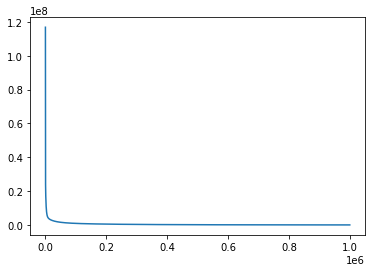

In [63]:
weights, biases, cost = fit(weights, biases, XTrdat, YTrdat, alpha=0.001, iters=1000000)
cost = np.array(cost)
plt.plot(cost[:,0],cost[:,1])
print(cost[-1])

In [64]:
Ypred = predict(weights, biases, XTest)
r_squared(Ypred, YTest)

0.9891403654320102